# End-To-End  Example of Rain Field Generation using PyNNCML Via RainGAN
This notebook presents an end-to-end example of rain field generation using a Conditional Generative Adavrasrail Network  [1] trained on the  openMRG dataset.
This tutorial is built using the PyNNCML software package, which provides  tools to simplify the usage of RainGAN.
The tutorial is divided into the following sections:
1. Imports and Installation of PyNNCML
2. Initialization of the Rain Field Generation Function
3. Rain Coverage Plot
4. N Peaks Plot
5. Peak Rain Rate Plot

[Run this tutorial in Google Colab](https://colab.research.google.com/github/haihabi/PyNNcml/blob/main/examples/rain_generator_notebook.ipynb)


In [28]:
# Imports and Installation of PyNNCML
import os
import sys
if os.path.exists('../pynncml'):
    print("Import PyNNCML From Code")
    sys.path.append('../')  # This line is need to import pynncml
else:
    print("Install PyNNCML From pip")
    !pip install pynncml
import pynncml as pnc
from matplotlib import pyplot as plt

In [21]:
# Initialize the Rain Field Generation Function with the desired resolution of 32x32.
rfg = pnc.simulation.get_rain_filed_generation_function(32, 32)

Current Working Device is set to:cuda


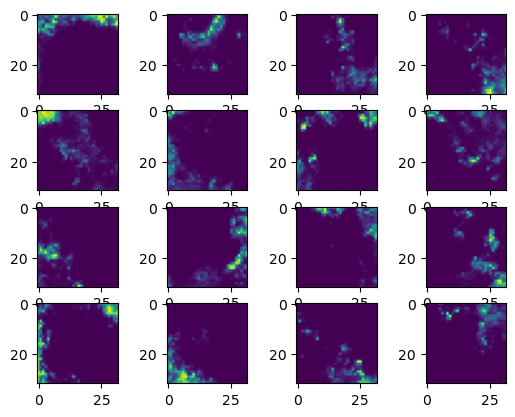

In [22]:
# Generate a sample of rain fields with a rain coverage of 0.1, 5 peaks, and a peak rain rate of 1.
# Here we generate a batch of 16 samples showing the rain fields generated diverse samples.
k = 4
sample = rfg(rain_coverage=0.1,
             n_peaks=5,
             peak_rain_rate=1,
             batch_size=k ** 2)
for i in range(k):
    for j in range(k):
        plt.subplot(k, k, i + 1 + 4 * j)
        plt.imshow(sample[i + 4 * j, :, :])
plt.show()

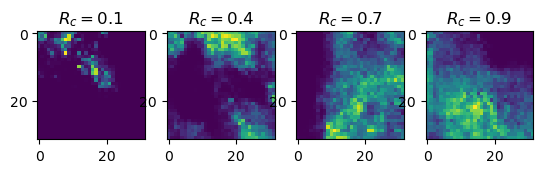

In [23]:
# Generate a sample of rain fields with a rain coverage of values 0.1,0.4,0.7 and 0.9 to show the effect of rain coverage on the generated rain fields.
rain_coverage = [0.1, 0.4, 0.7, 0.9]
for i, r in enumerate(rain_coverage):
    plt.subplot(1, len(rain_coverage), i + 1)
    sample = rfg(r, 5, 1, batch_size=1)
    plt.imshow(sample[0, :, :])
    plt.title(f"$R_c={r}$")
plt.show()

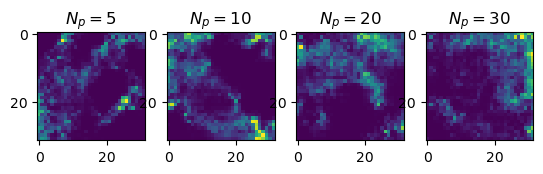

In [24]:
# Generate a sample of rain fields with a different number peak values 5,10,20 and 30 to show the effect of number peaks on the generated rain fields.
n_peaks_array = [5, 10, 20, 30]
for i, n_p in enumerate(n_peaks_array):
    plt.subplot(1, len(n_peaks_array), i + 1)
    sample = rfg(0.3, n_p, 1, batch_size=1)
    plt.imshow(sample[0, :, :])
    plt.title(f"$N_p={n_p}$")
plt.show()